# Adaptive Cluster Tests

Noteboook for quickly looking at spectra for different values of tau. Mainly to test ginelli code is running on the cluster

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import ginelli_plot as ginplt
from tqdm.notebook import tqdm
import os

In [76]:
directory = 'tau-small-test'
files = os.listdir(directory)
files.sort()
tau_test=[]
for experiment in tqdm(files):
    ds = xr.open_mfdataset(directory + f'/{experiment}/'
                           + 'step5/*.nc', parallel=True, combine='by_coords', concat_dim='time')
    tau_test.append(ds)

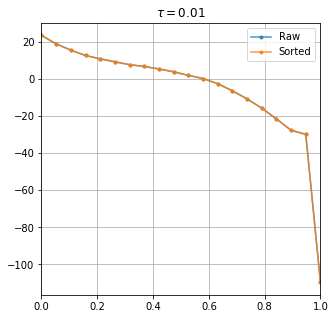

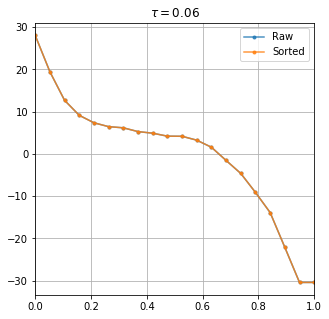

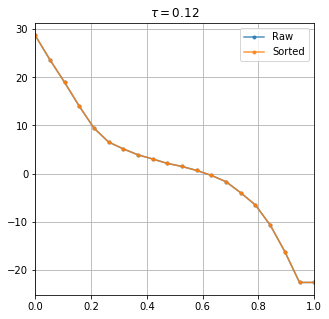

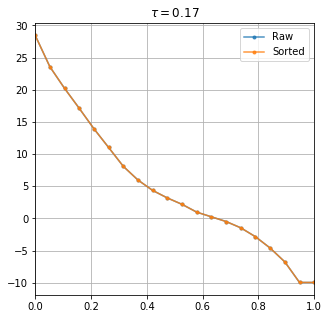

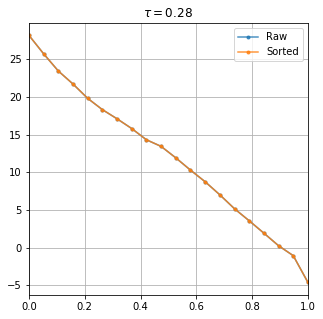

In [77]:
# Plotting Spectra

for data in tau_test:
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    ax.set_xlim((0, 1))
    spectra = ginplt.spectra(data)
    sorted_spec = np.flip(np.sort(spectra.values))
    ax.grid()
    ax.plot(np.linspace(0, 1, len(spectra)), spectra, '.-', alpha=0.8, label='Raw')
    ax.plot(np.linspace(0, 1, len(spectra)), sorted_spec, '.-', alpha=0.8, label='Sorted')
    ax.legend()
    ax.set_title(f'$\\tau = ${data.tau:.2f}')
    fig.show()

# Tau comparison

Bear in mind a larger tau is actually a longer trajectory

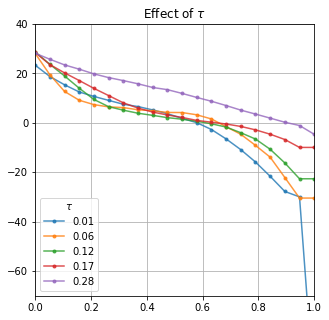

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_xlim((0, 1))
ax.set_ylim((-70, 40))
ax.grid()
ax.set_title(f'Effect of $\\tau$')

for data in tau_test:
    spectra = ginplt.spectra(data)
    sorted_spec = np.flip(np.sort(spectra.values))
    ax.plot(np.linspace(0, 1, len(spectra)), sorted_spec, '.-', alpha=0.8, label=f'{data.tau:.2f}')

ax.legend(title='$\\tau$')
fig.show()